# Basic

In [1]:
from mxnet import ndarray as nd

In [2]:
nd.zeros((3,4))


[[ 0.  0.  0.  0.]
 [ 0.  0.  0.  0.]
 [ 0.  0.  0.  0.]]
<NDArray 3x4 @cpu(0)>

In [3]:
x = nd.ones((3,4))
x


[[ 1.  1.  1.  1.]
 [ 1.  1.  1.  1.]
 [ 1.  1.  1.  1.]]
<NDArray 3x4 @cpu(0)>

In [4]:
nd.array([[1,2],[2,3]])


[[ 1.  2.]
 [ 2.  3.]]
<NDArray 2x2 @cpu(0)>

In [5]:
x.shape

(3, 4)

In [6]:
x.size

12

In [7]:
y = nd.random_normal(loc=0, scale=1, shape=(3,4))
y


[[ 1.16307867  0.48380461  0.29956347  0.15302546]
 [-1.16881478  1.55807114 -0.54594457 -2.35562968]
 [ 0.54144019  2.67850661  1.25463438 -0.54877394]]
<NDArray 3x4 @cpu(0)>

In [8]:
y.T


[[ 1.16307867 -1.16881478  0.54144019]
 [ 0.48380461  1.55807114  2.67850661]
 [ 0.29956347 -0.54594457  1.25463438]
 [ 0.15302546 -2.35562968 -0.54877394]]
<NDArray 4x3 @cpu(0)>

In [9]:
x + y


[[ 2.16307878  1.48380458  1.29956341  1.15302551]
 [-0.16881478  2.55807114  0.45405543 -1.35562968]
 [ 1.54144025  3.67850661  2.25463438  0.45122606]]
<NDArray 3x4 @cpu(0)>

In [10]:
x * y 


[[ 1.16307867  0.48380461  0.29956347  0.15302546]
 [-1.16881478  1.55807114 -0.54594457 -2.35562968]
 [ 0.54144019  2.67850661  1.25463438 -0.54877394]]
<NDArray 3x4 @cpu(0)>

In [11]:
nd.exp(y)


[[  3.19976926   1.6222347    1.34926963   1.16535461]
 [  0.31073502   4.74965096   0.57929432   0.09483377]
 [  1.71847999  14.56332874   3.50655603   0.57765764]]
<NDArray 3x4 @cpu(0)>

In [12]:
nd.dot(x, y.T)


[[ 2.09947205 -2.51231766  3.92580724]
 [ 2.09947205 -2.51231766  3.92580724]
 [ 2.09947205 -2.5123179   3.92580724]]
<NDArray 3x3 @cpu(0)>

In [13]:
a = nd.arange(3).reshape((3,1))
b = nd.arange(2).reshape((1,2))
print('a:', a)
print('b:', b)
print('a+b:', a+b)

a: 
[[ 0.]
 [ 1.]
 [ 2.]]
<NDArray 3x1 @cpu(0)>
b: 
[[ 0.  1.]]
<NDArray 1x2 @cpu(0)>
a+b: 
[[ 0.  1.]
 [ 1.  2.]
 [ 2.  3.]]
<NDArray 3x2 @cpu(0)>


In [14]:
import numpy as np
x = np.ones((2,3))
y = nd.array(x)
z = y.asnumpy()
print([z, y])

[array([[ 1.,  1.,  1.],
       [ 1.,  1.,  1.]], dtype=float32), 
[[ 1.  1.  1.]
 [ 1.  1.  1.]]
<NDArray 2x3 @cpu(0)>]


## autograd

In [15]:
import mxnet.autograd as ag
x = nd.array([[1,2],[3,4]])

In [16]:
x.attach_grad()
with ag.record():
    y = x * 2
    z = y * x
z.backward()

In [17]:
z


[[  2.   8.]
 [ 18.  32.]]
<NDArray 2x2 @cpu(0)>

In [18]:
print('x.grad: ', x.grad)
x.grad == 4*x

x.grad:  
[[  4.   8.]
 [ 12.  16.]]
<NDArray 2x2 @cpu(0)>



[[ 1.  1.]
 [ 1.  1.]]
<NDArray 2x2 @cpu(0)>

## Linear Regression

In [19]:
num_inputs = 2 
num_examples = 1000
true_w = [2, -3.4]
true_b = 4.2
X = nd.random_normal(shape=(num_examples, num_inputs))
y = true_w[0] * X[:,0] + true_w[1] * X[:,1] + true_b
y += 0.01 * nd.random_normal(shape=y.shape)

In [20]:
print(X[0], y[0])


[-0.68106437 -0.13531584]
<NDArray 2 @cpu(0)> 
[ 3.31950903]
<NDArray 1 @cpu(0)>


In [21]:
import matplotlib.pylab as plt
%matplotlib inline

In [22]:
plt.scatter??

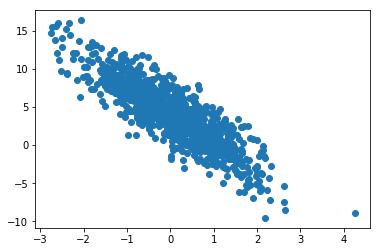

In [23]:
plt.scatter(X[:,1].asnumpy(), y.asnumpy())
plt.show()

In [24]:
nd.take??

In [25]:
import random
batch_size = 10
def data_iter():
    # generate a random index
    idx = list(range(num_examples))
    random.shuffle(idx)
    for i in range(0, num_examples, batch_size):
        j = nd.array(idx[i:min(i+batch_size, num_examples)])
        yield nd.take(X, j), nd.take(y, j)

In [26]:
for data, label in data_iter():
    print(data, label)
    break


[[ 2.04545832  0.57071602]
 [-0.55584627 -0.44066197]
 [-0.8299827  -0.36128798]
 [ 1.05407798 -2.72513509]
 [ 0.53900266  0.15226783]
 [-0.74845386  1.51530015]
 [ 0.76649487  0.36059555]
 [-0.3850058   2.08175182]
 [-1.81979823  0.5467332 ]
 [-0.20937304  1.05895412]]
<NDArray 10x2 @cpu(0)> 
[  6.3560915    4.59547186   3.76250315  15.57827187   4.75485039
  -2.42594576   4.50199556  -3.64121842  -1.29747486   0.17203386]
<NDArray 10 @cpu(0)>


In [27]:
w = nd.random_normal(shape=(num_inputs,1))
b = nd.zeros((1,))
params = [w,b]

In [28]:
for param in params:
    param.attach_grad()

In [29]:
def net(X):
    return nd.dot(X, w) + b

In [30]:
def square_loss(yhat, y):
    return (yhat - y.reshape(yhat.shape)) ** 2 / 2 

In [31]:
def SGD(params, lr):
    for param in params:
        param[:] = param - lr * param.grad

In [32]:
def real_fn(X):
    return 2 * X[:,0] - 3.4 * X[:,1] + 4.2

In [33]:
def plot(losses, X, sample_size=100):
    xs = list(range(len(losses)))
    f, (fg1, fg2) = plt.subplots(1,2)
    fg1.set_title('Loss during training')
    fg1.plot(xs, losses, '-r')
    fg2.set_title('Estimated vs real function')
    fg2.plot(X[:sample_size, 1].asnumpy(), \
             net(X[:sample_size,:]).asnumpy(), 'or', label='Estimated')
    fg2.plot(X[:sample_size, 1].asnumpy(), \
             real_fn(X[:sample_size,:]).asnumpy(), '*g', label='Real')
    fg2.legend()
    plt.show()

Epoch 0, batch 99. Moving avg of loss: 7.38251402279. Average loss: 8.485169


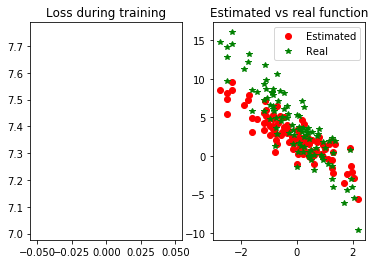

Epoch 1, batch 199. Moving avg of loss: 2.66751488471. Average loss: 1.117934


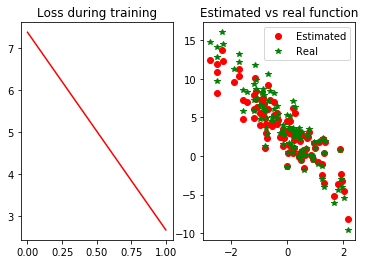

Epoch 2, batch 299. Moving avg of loss: 0.97282629791. Average loss: 0.148155


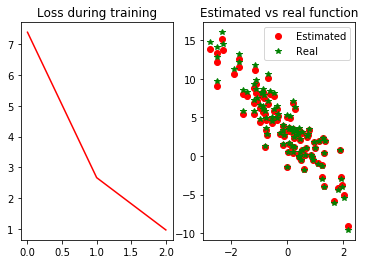

Epoch 3, batch 399. Moving avg of loss: 0.355854832111. Average loss: 0.019705


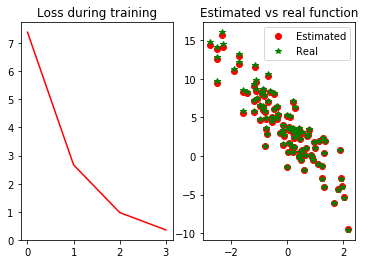

Epoch 4, batch 499. Moving avg of loss: 0.130217667851. Average loss: 0.002675


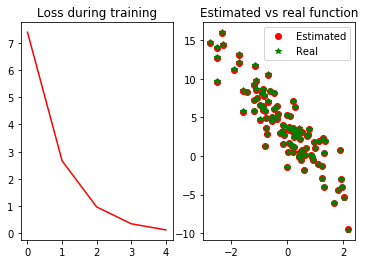

In [34]:
epochs = 5
learning_rate = 0.001
niter = 0
losses = []
moving_loss = 0
smoothing_constant = 0.01
for e in range(epochs):
    total_loss = 0
    for data, label in data_iter():
        with ag.record():
            output = net(data)
            loss = square_loss(output, label)
        loss.backward()
        SGD(params, learning_rate)
        total_loss += nd.sum(loss).asscalar()
        
        niter += 1
        curr_loss = nd.mean(loss).asscalar()
        moving_loss = (1 - smoothing_constant) * moving_loss + smoothing_constant * curr_loss
        
        # correct the bias from the moving averages
        est_loss = moving_loss / (1-(1-smoothing_constant)**niter)
        if(niter+1) % 100 == 0:
            losses.append(est_loss)
            print("Epoch %s, batch %s. Moving avg of loss: %s. Average loss: %f" % \
                  (e, niter, est_loss, total_loss/num_examples))
            plot(losses, X)

In [35]:
true_w, w

([2, -3.4], 
 [[ 1.9925884 ]
  [-3.37248349]]
 <NDArray 2x1 @cpu(0)>)

In [36]:
true_b, b

(4.2, 
 [ 4.17211533]
 <NDArray 1 @cpu(0)>)

### linear-regression-gluon

In [37]:
from mxnet import ndarray as nd
from mxnet import autograd
from mxnet import gluon

num_inputs = 2
num_examples = 1000

true_w = [2, -3.4]
true_b = 4.2

X = nd.random_normal(shape=(num_examples, num_inputs))
y = true_w[0] * X[:,0] + true_w[1] * X[:,1] + true_b
y += 0.01 * nd.random_normal(shape=y.shape)

In [38]:
batch_size = 10
dataset = gluon.data.ArrayDataset(X, y)
data_iter = gluon.data.DataLoader(dataset, batch_size, shuffle=True)

In [39]:
for data, label in data_iter:
    print(data, label)
    break


[[  5.94737053e-01   4.71330494e-01]
 [  1.15733492e+00   3.71680200e-01]
 [  1.33661199e+00  -9.87369800e-04]
 [ -5.55926800e-01  -5.13532102e-01]
 [  4.47911888e-01  -1.66681826e+00]
 [ -7.42499948e-01  -3.83728415e-01]
 [ -1.80526936e+00  -1.10658503e+00]
 [  4.63097692e-01   3.10197771e-01]
 [ -2.35979736e-01  -2.68790513e-01]
 [ -1.24427414e+00  -2.13891149e+00]]
<NDArray 10x2 @cpu(0)> 
[  3.80620623   5.25626421   6.87739515   4.84256649  10.75989437
   4.02258682   4.33864784   4.07305765   4.6436615    8.99226379]
<NDArray 10 @cpu(0)>


In [40]:
net = gluon.nn.Sequential()
net.add(gluon.nn.Dense(1))
net.initialize()
square_loss = gluon.loss.L2Loss()
trainer = gluon.Trainer(net.collect_params(), 'sgd', {'learning_rate': 0.1})

In [41]:
epochs = 5
batch_size = 10
for e in range(epochs):
    total_loss = 0
    for data, label in data_iter:
        with autograd.record():
            output = net(data)
            loss = square_loss(output, label)
        loss.backward()
        trainer.step(batch_size)
        total_loss += nd.sum(loss).asscalar()
    print("Epoch %d, average loss: %s" % (e, total_loss/num_examples))

Epoch 0, average loss: 0.886401403508
Epoch 1, average loss: 5.06642723194e-05
Epoch 2, average loss: 5.05584608181e-05
Epoch 3, average loss: 5.08246969875e-05
Epoch 4, average loss: 5.05882944053e-05


In [42]:
dense = net[0]
print(true_w, dense.weight.data())
print(true_b, dense.bias.data())

[2, -3.4] 
[[ 1.9994868  -3.39956737]]
<NDArray 1x2 @cpu(0)>
4.2 
[ 4.19982195]
<NDArray 1 @cpu(0)>
